# Código recurso para generar figuras que introducir luego en el documento del trabajo.

In [73]:
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.sparse import csr_matrix
import time
import os
import matplotlib.pyplot as plt
from matplotlib import colormaps
import sys
import random
import seaborn as sns

import sklearn
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.optim as optim

np.set_printoptions(threshold=sys.maxsize)


In [74]:
plt.rcParams.update({
    'text.usetex': True,  # Usar LaTeX para el texto
    # 'text.usetex': False,  # NO Usar LaTeX para el texto
    'font.family': 'serif',  # Fuente serif
    # 'figure.figsize': (10, 6),  # Tamaño de la figura
    'axes.labelsize': 12,  # Tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,  # Tamaño del título
    'legend.fontsize': 12,  # Tamaño de la leyenda
    'xtick.labelsize': 10,  # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Tamaño de las etiquetas del eje y
    'axes.grid': True,  # Habilitar la cuadrícula
    'grid.alpha': 0.75,  # Transparencia de la cuadrícula
    'grid.linestyle': '--'  # Estilo de la línea de la cuadrícula
})

# Configuración de Seaborn
sns.set_context('paper')
sns.set_style('whitegrid')

### Funciones de activación

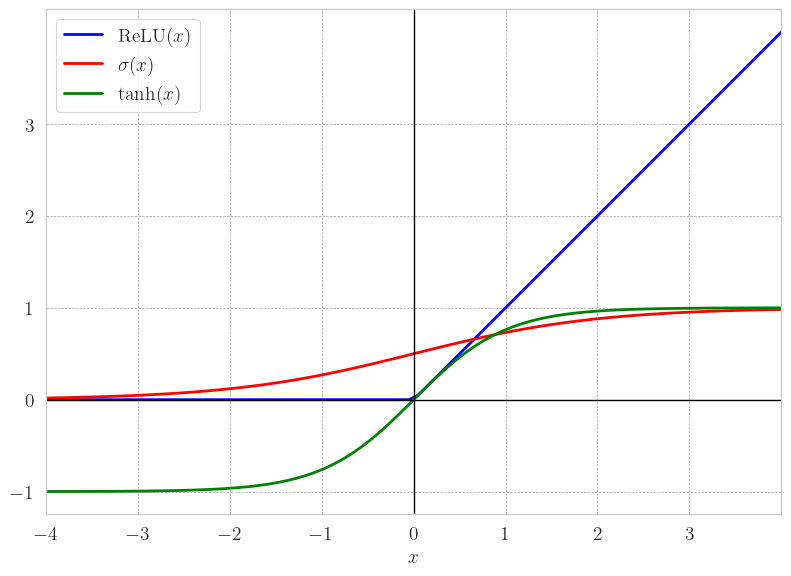

In [75]:
# Crear un rango de valores para x
x = np.linspace(-4, 4, 80)

# Definir la función ReLU
def relu(x):
    return np.maximum(0, x)

# definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# definir la función tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Calcular los valores de las funciones de activación
relu = relu(x)
sigmoid = sigmoid(x)
tanh = tanh(x)


# Configuración de la figura para publicación científica
plt.figure(figsize=(8, 6))

# Graficar las funciones de activación
plt.plot(x, relu, label=r'$\mathrm{ReLU}(x)$', color='blue', linewidth=2)
plt.plot(x, sigmoid, label=r'$\sigma(x)$', color='red', linewidth=2)
plt.plot(x, tanh, label=r'$\tanh(x)$', color='green', linewidth=2)

# Etiquetas de los ejes
plt.xlabel(r'$x$', fontsize=14)
# plt.ylabel(r'$\mathrm{ReLU}(x)$', fontsize=14)
plt.legend(fontsize=14)

# Líneas de referencia en los ejes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Configuración de la cuadrícula con aspecto cuadrado
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')  # Hace que la cuadrícula tenga celdas cuadradas

plt.xlim(-4, 4)

# Ajustar los ticks para que la cuadrícula se vea bien
plt.xticks(np.arange(-4, 4, 1), fontsize=14)
plt.yticks(np.arange(-1, 4, 1), fontsize=14)

# Ajustar márgenes para evitar cortes en etiquetas
plt.tight_layout()

# Guardar la imagen en alta calidad
plt.savefig("figures/activation_functions.pdf", format="pdf", dpi=300)

# Mostrar el gráfico
plt.show()


### Early stopping

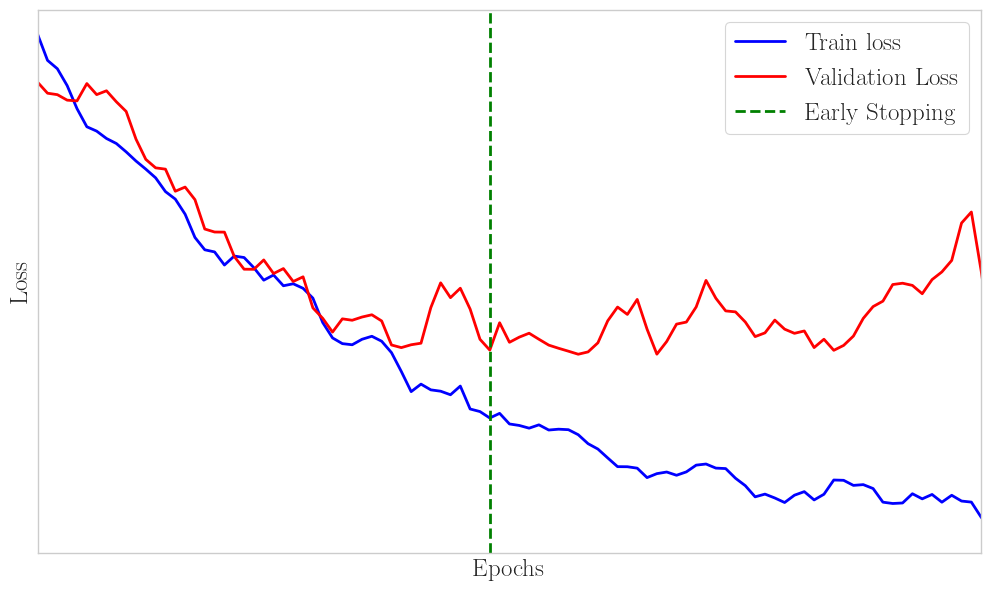

In [78]:
# Función para aplicar un filtro de media móvil
def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Simular datos de pérdida de entrenamiento y validación
np.random.seed(0)
epochs = 100
train_loss = np.logspace(0, -1, epochs) + np.random.normal(0, 0.05, epochs)
val_loss = np.logspace(0, -1, epochs) + np.random.normal(0, 0.1, epochs)
val_loss[30:] += np.linspace(0, 0.5, epochs-30)  # Simular sobreajuste después de 30 épocas

# Aplicar suavizado a los datos
train_loss_smooth = smooth(train_loss, 5)
val_loss_smooth = smooth(val_loss, 5)

# Determinar el punto de early stopping
early_stopping_epoch = np.argmin(val_loss_smooth[:50])  # Supongamos que usamos un patience de 50 épocas

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(train_loss_smooth, label=r'$\mathrm{Train\ loss}$', color='blue', linewidth=2)
plt.plot(val_loss_smooth, label=r'$\mathrm{Validation\ Loss}$', color='red', linewidth=2)
plt.axvline(early_stopping_epoch, linestyle='--', color='green', label=r'$\mathrm{Early\ Stopping}$', linewidth=2)
plt.xlabel(r'$\mathrm{Epochs}$', fontsize=18)
plt.ylabel(r'$\mathrm{Loss}$', fontsize=18)
# plt.title('Early Stopping durante el Entrenamiento de una Red Neuronal', fontsize=16)
plt.legend(fontsize=18)
# plt.grid(True)
plt.xlim(2, epochs-2)
plt.xticks([])  # Eliminar valores numéricos del eje x
plt.yticks([])  # Eliminar valores numéricos del eje y
plt.tight_layout()

# Guardar la imagen en alta calidad
plt.savefig("figures/early_stopping.pdf", format="pdf", dpi=300)

# Mostrar el gráfico
plt.show()